In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
df = pd.read_csv('Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
encoder = LabelEncoder()

In [8]:
df['Species'] = encoder.fit_transform(df['Species'])

In [9]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [11]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

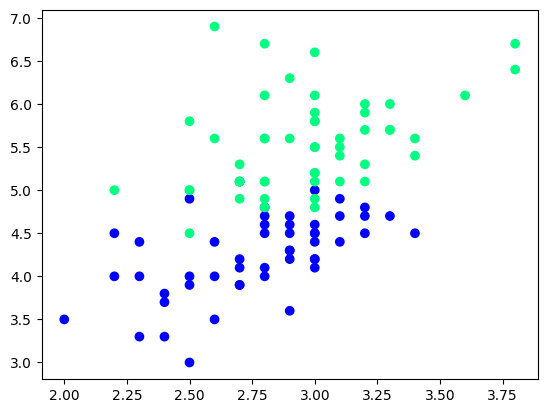

In [13]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [14]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
69,2.5,3.9,1
89,2.5,4.0,1
81,2.4,3.7,1
96,2.9,4.2,1
91,3.0,4.6,1
52,3.1,4.9,1
109,3.6,6.1,2
83,2.7,5.1,1
60,2.0,3.5,1


In [15]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [16]:
df_train

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
114,2.8,5.1,2
107,2.9,6.3,2
120,3.2,5.7,2
141,3.1,5.1,2
67,2.7,4.1,1
63,2.9,4.7,1
135,3.0,6.1,2
145,3.0,5.2,2
75,3.0,4.4,1


In [17]:
df_val

,SepalWidthCm,PetalLengthCm,Species
130,2.8,6.1,2
53,2.3,4.0,1
143,3.2,5.9,2
80,2.4,3.8,1
59,2.7,3.9,1


In [18]:
df_test

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
117,3.8,6.7,2
74,2.9,4.3,1
131,3.8,6.4,2
147,3.0,5.2,2


In [19]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [20]:
y_test

array([2, 1, 2, 1, 1])

# Case 1 - Bagging

In [21]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
114,2.8,5.1,2
114,2.8,5.1,2
57,2.4,3.3,1
135,3.0,6.1,2
145,3.0,5.2,2
145,3.0,5.2,2
67,2.7,4.1,1
145,3.0,5.2,2


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [23]:
dt_bag1 = DecisionTreeClassifier()

In [24]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))
    

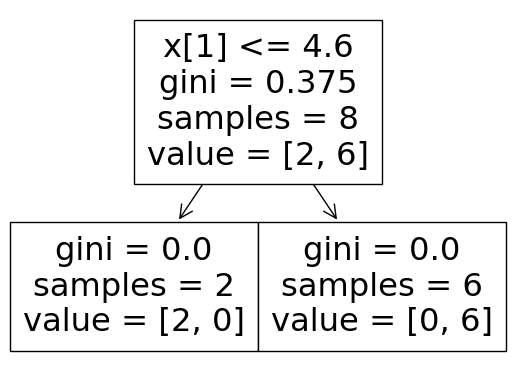

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


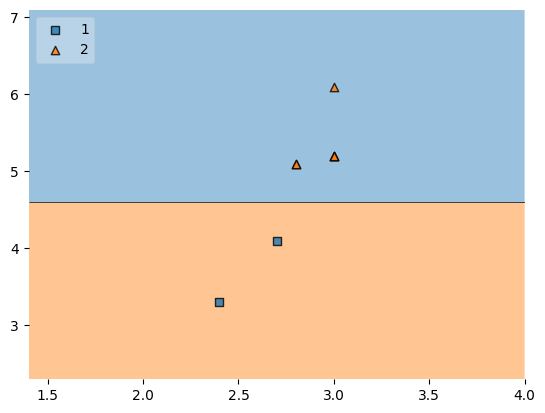

In [25]:
evaluate(dt_bag1,X,y)

In [26]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
141,3.1,5.1,2
145,3.0,5.2,2
57,2.4,3.3,1
57,2.4,3.3,1
75,3.0,4.4,1
120,3.2,5.7,2
114,2.8,5.1,2
145,3.0,5.2,2


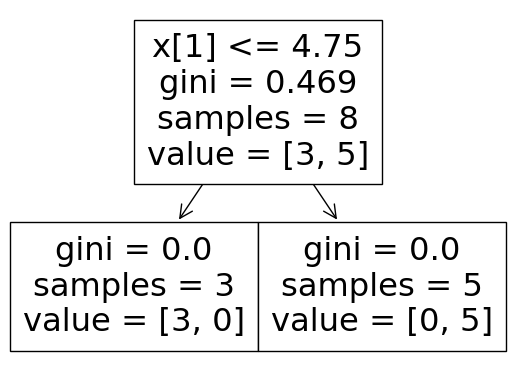

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


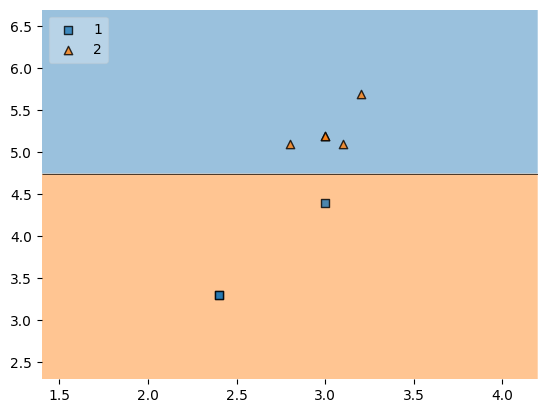

In [27]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [28]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
63,2.9,4.7,1
57,2.4,3.3,1
75,3.0,4.4,1
120,3.2,5.7,2
141,3.1,5.1,2
114,2.8,5.1,2
57,2.4,3.3,1
135,3.0,6.1,2


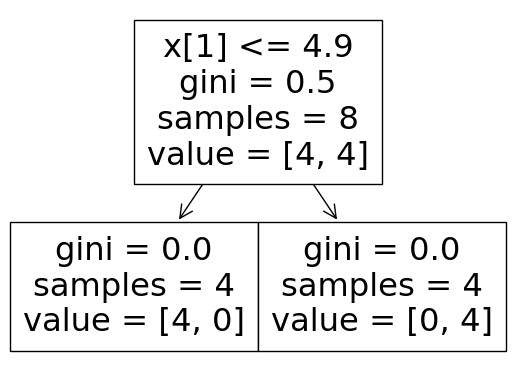

D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


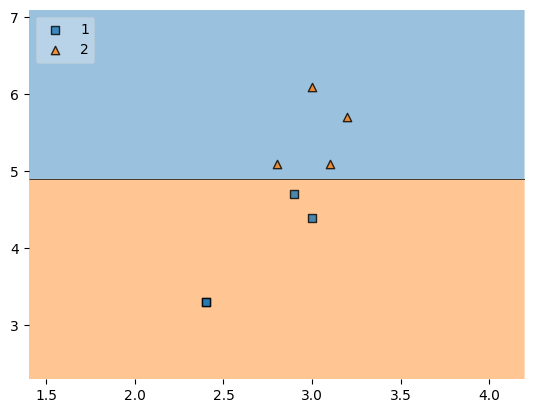

In [29]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [30]:
df_test

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
117,3.8,6.7,2
74,2.9,4.3,1
131,3.8,6.4,2
147,3.0,5.2,2


In [31]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
D:\ML\my_env\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Pasting

In [32]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
57,2.4,3.3,1
114,2.8,5.1,2
107,2.9,6.3,2
120,3.2,5.7,2
141,3.1,5.1,2
67,2.7,4.1,1
63,2.9,4.7,1
135,3.0,6.1,2
145,3.0,5.2,2
75,3.0,4.4,1


In [33]:
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
114,2.8,5.1,2
141,3.1,5.1,2
57,2.4,3.3,1
67,2.7,4.1,1
145,3.0,5.2,2
135,3.0,6.1,2
107,2.9,6.3,2


# Random Subspaces

In [35]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [36]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [37]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,PetalLengthCm
142,1.9,5.1
91,1.4,4.6
39,0.2,1.5
147,2.0,5.2
90,1.2,4.4
68,1.5,4.5
118,2.3,6.9
34,0.1,1.5
36,0.2,1.3
130,1.9,6.1


# Random Patches

In [38]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
142,143,5.8,2.7,5.1,1.9,Iris-virginica
91,92,6.1,3.0,4.6,1.4,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
118,119,7.7,2.6,6.9,2.3,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
36,37,5.5,3.5,1.3,0.2,Iris-setosa
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [39]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,SepalLengthCm,SepalLengthCm
68,6.2,6.2
36,5.5,5.5
34,4.9,4.9
34,4.9,4.9
142,5.8,5.8
142,5.8,5.8
91,6.1,6.1
68,6.2,6.2
